# Audio ANN

### Importing all libraries

In [ ]:
from google.colab import drive
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.models import Model
import pandas as pd

### Connecting to Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading datasets (Numpy arrays)
Datasets are saved in numpy arrays for load quickly

In [ ]:
X_train = np.load('/content/drive/MyDrive/ml_dl/audio-2/training_set/X_train.npy')
y_train = np.load('/content/drive/MyDrive/ml_dl/audio-2/training_set/y_train.npy')

X_validation = np.load('/content/drive/MyDrive/ml_dl/audio-2/validation_set/X_validation.npy')
y_validation = np.load('/content/drive/MyDrive/ml_dl/audio-2/validation_set/y_validation.npy')

X_test = np.load('/content/drive/MyDrive/ml_dl/audio-2/test_set/X_test.npy')
y_test = np.load('/content/drive/MyDrive/ml_dl/audio-2/test_set/y_test.npy')

X = np.load('/content/drive/MyDrive/ml_dl/audio-2/dataset/X.npy')
y = np.load('/content/drive/MyDrive/ml_dl/audio-2/dataset/y.npy')

In [ ]:
X_train.shape

(361, 30000)

### Reshaping datasets

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 100, 100, 3)
X_test = X_test.reshape(X_test.shape[0], 100, 100, 3)
X_validation = X_validation.reshape(X_validation.shape[0], 100, 100, 3)

### LeNet

In [ ]:
kernel_initializer = keras.initializers.glorot_uniform(seed = np.random.randint(20))

lenet = Sequential(name="LeNet")
lenet.add(layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (100, 100, 3)))
lenet.add(layers.MaxPool2D(strides = 2))
lenet.add(layers.Conv2D(filters = 48, kernel_size = (5,5), padding = 'valid', activation = 'relu'))
lenet.add(layers.MaxPool2D(strides = 2))
lenet.add(layers.Flatten())
lenet.add(layers.Dense(256, activation = 'relu', kernel_initializer = kernel_initializer))
lenet.add(layers.Dropout(0.5))
lenet.add(layers.Dense(84, activation = 'relu', kernel_initializer = kernel_initializer))
lenet.add(layers.Dropout(0.5))
lenet.add(layers.Dense(3, activation = 'softmax'))

print(lenet.summary())

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 48)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25392)             0         
                                                                 
 dense (Dense)               (None, 256)               650060

### LeNet training

In [ ]:
lenet.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')
#es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 1, patience = 3)
history = lenet.fit(X_train, y_train, epochs = 50, validation_data = (X_validation, y_validation),  batch_size = 128)

### Plotting LeNet accuracy and loss

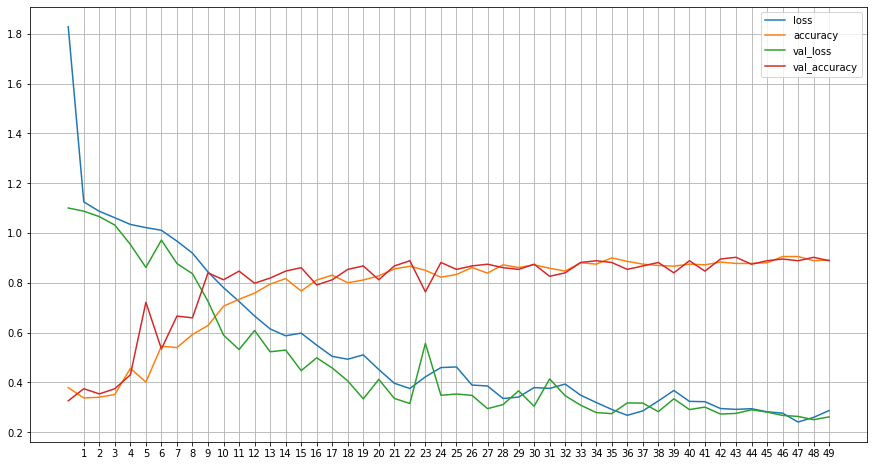

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True) 
plt.xticks(np.arange(1, 50, step=1))
plt.show()

### 10-fold Cross Validation using LeNet

In [ ]:
kf = KFold(10, shuffle = True, random_state = 42)
scores = []

for train, val in kf.split(X):
  # define folds
  X_train = X[train]
  y_train = y[train]
  X_val = X[val]
  y_val = y[val]
  X_train = X_train.reshape(X_train.shape[0], 100, 100, 3)
  X_val = X_val.reshape(X_val.shape[0], 100, 100, 3)

  print("-----------------\n")
  # define lenet
  kernel_initializer = keras.initializers.glorot_uniform(seed = np.random.randint(20))
  lenet = Sequential()
  lenet.add(layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (100, 100, 3)))
  lenet.add(layers.MaxPool2D(strides = 2))
  lenet.add(layers.Conv2D(filters = 48, kernel_size = (5,5), padding = 'valid', activation = 'relu'))
  lenet.add(layers.MaxPool2D(strides = 2))
  lenet.add(layers.Flatten())
  lenet.add(layers.Dense(256, activation = 'relu', kernel_initializer = kernel_initializer))
  lenet.add(layers.Dropout(0.5))
  lenet.add(layers.Dense(84, activation = 'relu', kernel_initializer = kernel_initializer))
  lenet.add(layers.Dropout(0.5))
  lenet.add(layers.Dense(3, activation = 'softmax'))
  # compile and fit lenet
  lenet.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')
  #es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 1, patience = 3)
  history = lenet.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val),  batch_size = 128)
  #predict
  y_pred = lenet.predict(X_val)
  y_pred = np.argmax(y_pred,axis=1)
  scores.append(accuracy_score(y_val,y_pred))

  tf.keras.backend.clear_session()

### 10-fold Cross Validation using LeNet PERFORMANCE

In [ ]:
k_fold_acc = np.mean(scores)
print("\n10-fold cross validation accuracy: " + str(k_fold_acc))


10-fold cross validation accuracy: 0.9154098360655738


### Building a custom ANN - CNN
This CNN increases performance

In [ ]:
kernel_initializer = keras.initializers.glorot_uniform(seed=np.random.randint(20))

model_conv = keras.Sequential(name="Convolutional_Neural_Network")
model_conv.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(layers.Flatten())
model_conv.add(layers.Dense(64, activation='relu',kernel_initializer=kernel_initializer, kernel_regularizer = keras.regularizers.l2(1/1000)))
model_conv.add(layers.Dense(3, activation='softmax'))

print(model_conv.summary())

Model: "Convolutional_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 28

### CNN training

In [ ]:
model_conv.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=3)
history_cnn = model_conv.fit(X_train, y_train, epochs= 50, validation_data = (X_validation, y_validation),  batch_size=128)

### Plotting CNN accuracy and loss

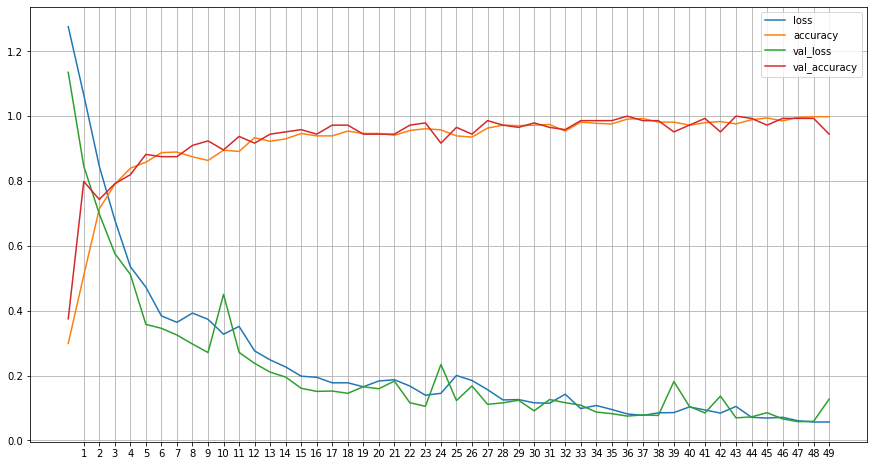

In [ ]:
pd.DataFrame(history_cnn.history).plot(figsize=(15,8))
plt.grid(True) 
plt.xticks(np.arange(1, 50, step=1))
plt.show()

### Testing CNN on test-set

In [ ]:
l=[]
y_test=np.asarray(y_test)
scores=model_conv.evaluate(X_test, y_test)
l.append(scores[1])

4/4 [==============================] - 0s 6ms/step - loss: 0.1369 - accuracy: 0.9588


### 10-fold Cross Validation using CNN

In [ ]:
kf = KFold(10, shuffle = True, random_state = 42)
scores = []

for train, val in kf.split(X):
  # define folds
  X_train = X[train]
  y_train = y[train]
  X_val = X[val]
  y_val = y[val]
  X_train = X_train.reshape(X_train.shape[0], 100, 100, 3)
  X_val = X_val.reshape(X_val.shape[0], 100, 100, 3)

  print("-----------------\n")
  # define cnn
  kernel_initializer = keras.initializers.glorot_uniform(seed=np.random.randint(20))
  model_conv = keras.Sequential()
  model_conv.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
  model_conv.add(layers.MaxPooling2D((2, 2)))
  model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model_conv.add(layers.MaxPooling2D((2, 2)))
  model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model_conv.add(layers.Flatten())
  model_conv.add(layers.Dense(64, activation='relu',kernel_initializer=kernel_initializer, kernel_regularizer = keras.regularizers.l2(1/1000)))
  model_conv.add(layers.Dense(3, activation='softmax'))
  # compile and fit cnn
  model_conv.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')
  es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 1, patience = 3)
  history = model_conv.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val),  batch_size = 128)
  #predict
  y_pred = model_conv.predict(X_val)
  y_pred = np.argmax(y_pred,axis=1)
  scores.append(accuracy_score(y_val,y_pred))

  tf.keras.backend.clear_session()

### 10-fold Cross Validation using CNN - PERFORMANCE

In [ ]:
k_fold_acc = np.mean(scores)
print("\n10-fold cross validation accuracy - CNN: " + str(k_fold_acc))


10-fold cross validation accuracy - CNN: 0.9351639344262294


### Saving the best model

In [ ]:
model_path = "/content/drive/MyDrive/ml_dl/audio-2/models/audio_cnn.h5"
model_conv.save(model_path)
model_conv = keras.models.load_model(model_path)